In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from pathlib import Path
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os.path

In [2]:
image_dir = Path("C:/Users/NET_PC/Desktop/Adrenocortical carcionoma project/JPG 2 Data")

In [3]:
filepaths = list(image_dir.glob(r'**/*.JPG'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [4]:
image_df

,Filepath,Label
0,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Adrenocortical carcinoma JPG (Type 2)
1,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Adrenocortical carcinoma JPG (Type 2)
2,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Adrenocortical carcinoma JPG (Type 2)
3,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Adrenocortical carcinoma JPG (Type 2)
4,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Adrenocortical carcinoma JPG (Type 2)
...,...,...
36425,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Kidney tumor JPG (Type 2)
36426,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Kidney tumor JPG (Type 2)
36427,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Kidney tumor JPG (Type 2)
36428,C:\Users\NET_PC\Desktop\Adrenocortical carcion...,Kidney tumor JPG (Type 2)


In [1]:
train_df, test_df = train_test_split(image_df, train_size=0.80, shuffle=True, random_state=1)

NameError: name 'train_test_split' is not defined

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [2]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                   x_col='Filepath',
                                                   y_col='Label',
                                                   target_size=(64, 64),
                                                   color_mode='rgb',
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   shuffle=True,
                                                   seed=42,
                                                   subset='training')

val_images = train_generator.flow_from_dataframe(dataframe=train_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=True,
                                                 seed=42,
                                                 subset='validation')

test_images = test_generator.flow_from_dataframe(dataframe=test_df,
                                                 x_col='Filepath',
                                                 y_col='Label',
                                                 target_size=(64, 64),
                                                 color_mode='rgb',
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=False)

NameError: name 'train_generator' is not defined

In [3]:
# Define the EfficientNetB0 model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(64, 64, 3))

NameError: name 'EfficientNetB0' is not defined

In [9]:
# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [10]:
# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

In [11]:
# Add a binary classification layer
predictions = Dense(1, activation='sigmoid')(x)

In [12]:
# Combine the base model and our layers to create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/50
729/729 [==============================] - 370s 502ms/step - loss: 0.5565 - accuracy: 0.7204 - val_loss: 0.4701 - val_accuracy: 0.7915 - lr: 1.0000e-04
Epoch 2/50
729/729 [==============================] - 298s 409ms/step - loss: 0.4733 - accuracy: 0.7785 - val_loss: 0.4535 - val_accuracy: 0.7938 - lr: 1.0000e-04
Epoch 3/50
729/729 [==============================] - 296s 405ms/step - loss: 0.4198 - accuracy: 0.8098 - val_loss: 0.3724 - val_accuracy: 0.8391 - lr: 1.0000e-04
Epoch 4/50
729/729 [==============================] - 258s 353ms/step - loss: 0.3860 - accuracy: 0.8329 - val_loss: 0.3419 - val_accuracy: 0.8593 - lr: 1.0000e-04
Epoch 5/50
729/729 [==============================] - 308s 423ms/step - loss: 0.3553 - accuracy: 0.8468 - val_loss: 0.3036 - val_accuracy: 0.8809 - lr: 1.0000e-04
Epoch 6/50
729/729 [==============================] - 279s 382ms/step - loss: 0.3336 - accuracy: 0.8584 - val_loss: 0.2800 - val_accuracy: 0.8902 - lr: 1.0000e-04
Epoch 7/50
729/729 [==

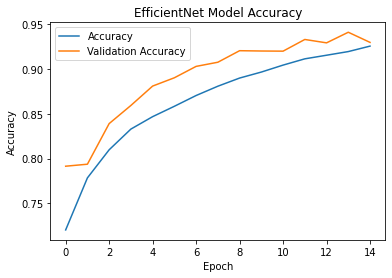

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('EfficientNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy', 'loss', 'Validation Loss'])
plt.show()

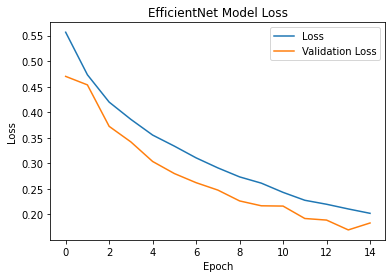

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientNet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [18]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.17147
Test Accuracy: 94.26%


228/228 [==============================] - 72s 254ms/step


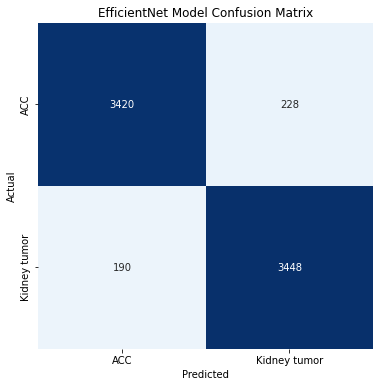

Classification Report:
----------------------
               precision    recall  f1-score   support

         ACC       0.95      0.94      0.94      3648
Kidney tumor       0.94      0.95      0.94      3638

    accuracy                           0.94      7286
   macro avg       0.94      0.94      0.94      7286
weighted avg       0.94      0.94      0.94      7286



In [19]:
predictions = (model.predict(test_images) >= 0.5).astype(int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["ACC", "Kidney tumor"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["ACC", "Kidney tumor"])
plt.yticks(ticks=[0.5, 1.5], labels=["ACC", "Kidney tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("EfficientNet Model Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

228/228 [==============================] - 55s 237ms/step
AUC ROC: 0.98570


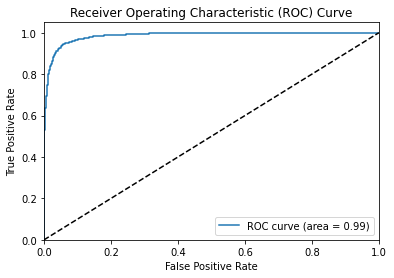

In [21]:
# Obtain predicted probabilities
from sklearn.metrics import roc_auc_score, roc_curve

predicted_probabilities = model.predict(test_images)

# Compute AUC ROC
auc_roc = roc_auc_score(test_images.labels, predicted_probabilities)

print("AUC ROC: {:.5f}".format(auc_roc))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_images.labels, predicted_probabilities)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
# save the model to a file
model.save('EfficientNet.h5')